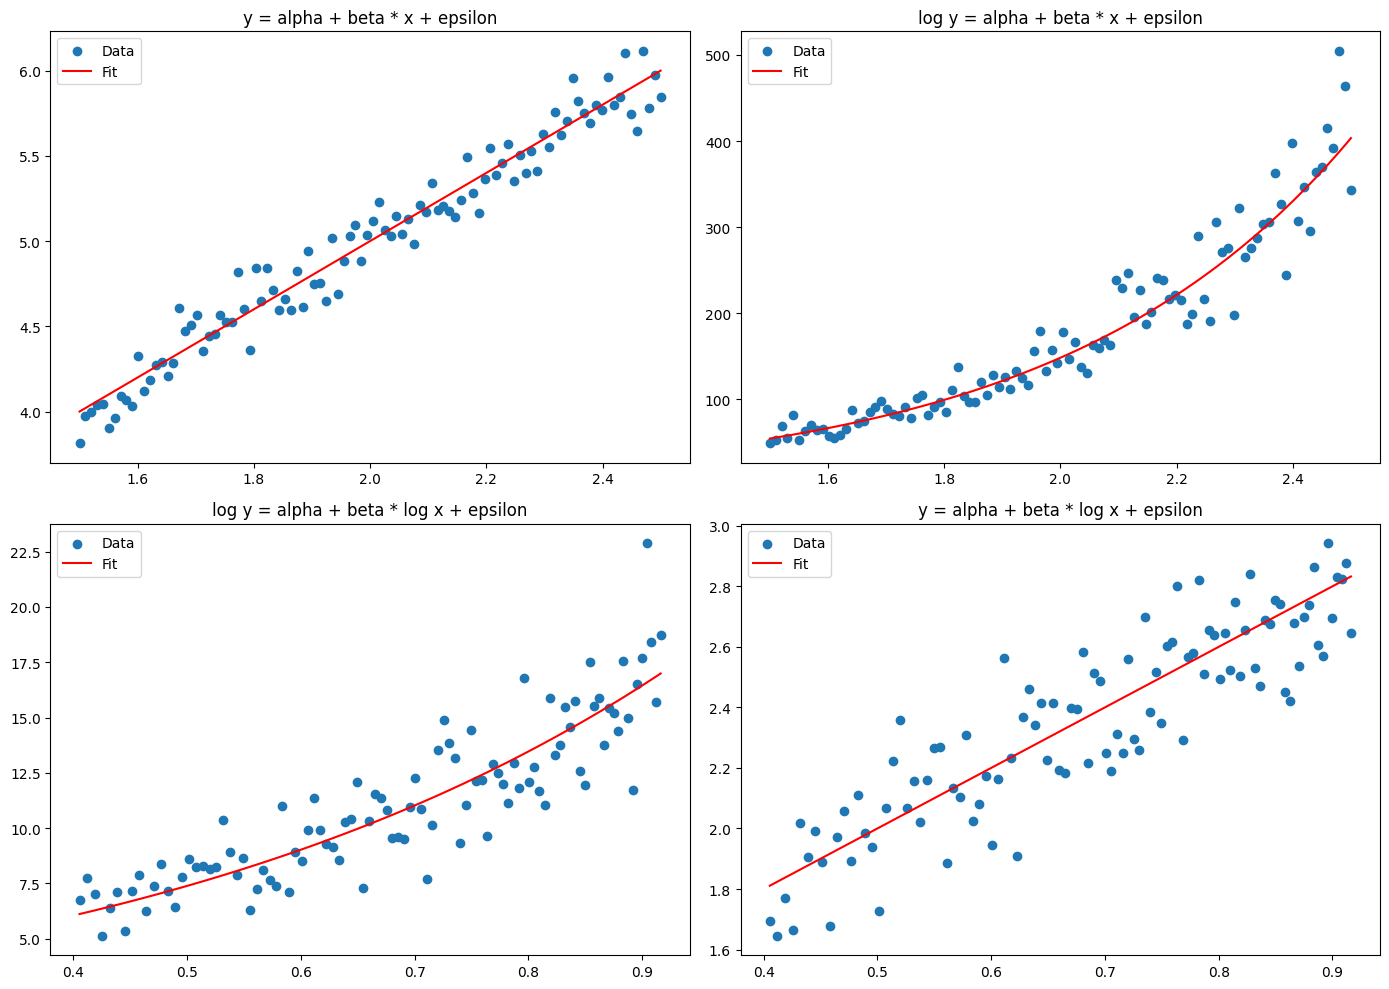

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2309.
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           6.19e-70
Time:                        13:17:46   Log-Likelihood:                 69.829
No. Observations:                 100   AIC:                            -135.7
Df Residuals:                      98   BIC:                            -130.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9850      0.084     11.687      0.0

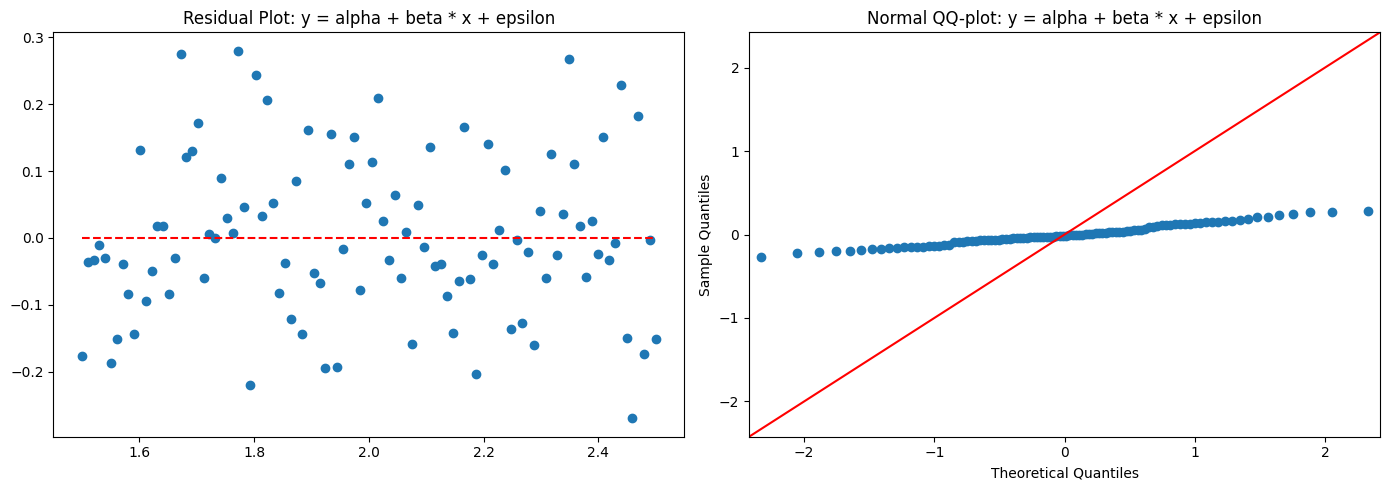

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Parameters
alpha = 1.0
beta = 2.0
sigma = 0.15
n = 100

# Generating x values
x = np.linspace(1.5, 2.5, n)

# Model 1: y_i = alpha + beta * x_i + epsilon_i
y1 = alpha + beta * x + np.random.normal(0, sigma, n)

# Model 2: log y_i = alpha + beta * x_i + epsilon_i
log_y2 = alpha + beta * x + np.random.normal(0, sigma, n)
y2 = np.exp(log_y2)

# Model 3: log y_i = alpha + beta * log x_i + epsilon_i
log_x3 = np.log(x)
log_y3 = alpha + beta * log_x3 + np.random.normal(0, sigma, n)
y3 = np.exp(log_y3)

# Model 4: y_i = alpha + beta * log x_i + epsilon_i
y4 = alpha + beta * log_x3 + np.random.normal(0, sigma, n)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: y_i = alpha + beta * x_i + epsilon_i
axs[0, 0].scatter(x, y1, label='Data')
axs[0, 0].plot(x, alpha + beta * x, color='red', label='Fit')
axs[0, 0].set_title('y = alpha + beta * x + epsilon')
axs[0, 0].legend()

# Plot 2: log y_i = alpha + beta * x_i + epsilon_i
axs[0, 1].scatter(x, y2, label='Data')
axs[0, 1].plot(x, np.exp(alpha + beta * x), color='red', label='Fit')
axs[0, 1].set_title('log y = alpha + beta * x + epsilon')
axs[0, 1].legend()

# Plot 3: log y_i = alpha + beta * log x_i + epsilon_i
axs[1, 0].scatter(log_x3, y3, label='Data')
axs[1, 0].plot(log_x3, np.exp(alpha + beta * log_x3), color='red', label='Fit')
axs[1, 0].set_title('log y = alpha + beta * log x + epsilon')
axs[1, 0].legend()

# Plot 4: y_i = alpha + beta * log x_i + epsilon_i
axs[1, 1].scatter(log_x3, y4, label='Data')
axs[1, 1].plot(log_x3, alpha + beta * log_x3, color='red', label='Fit')
axs[1, 1].set_title('y = alpha + beta * log x + epsilon')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Ordinary linear regression on x and y1
X = sm.add_constant(x)
model1 = sm.OLS(y1, X).fit()
print(model1.summary())

# Residual plot and QQ-plot for model 1
residuals1 = model1.resid
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].scatter(x, residuals1)
axs[0].hlines(0, min(x), max(x), colors='red', linestyles='dashed')
axs[0].set_title('Residual Plot: y = alpha + beta * x + epsilon')

# QQ-plot
sm.qqplot(residuals1, line ='45', ax=axs[1])
axs[1].set_title('Normal QQ-plot: y = alpha + beta * x + epsilon')

plt.tight_layout()
plt.show()

# Repeat for other models as necessary
